# 科移水质数据初步概览

## 站点数据导入与格式概览
可以看到，站点数据包括约28个站点，分属于不同的河流（riverway_no），不过每条河流一般只有1～2个站点

In [1]:
import pandas as pd
import numpy as np
import ggplot as gp
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
import datetime
from dateutil.parser import parse

site_data = pd.read_csv('/data/inesa/water/bb.csv')
#water_data = csv.reader(open('/data/inesa/water/aa.csv', encoding='utf-8'))
#site_data = csv.reader(open('/data/inesa/water/bb.csv', encoding='utf-8'))
site_data

/home/inesa/.local/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/inesa/.local/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/inesa/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,site_no,name,riverway_no,addr,GPS,SIM,staff_no,maintenance_period
0,23,10000,小房子,1,反而,"121.449451,31.120051",1.512346e+10,0.0,10.0
1,24,10001,蒲汇塘站,1,宜山路桥与文定路桥中间(河道绿化),"121.445752,31.159928",1.334568e+10,1.0,30.0
2,25,10002,漕河泾港站,2,上师大附中内桂林路桥,"121.437355,31.171945",1.334568e+10,2.0,20.0
3,26,10003,张家塘港站1,3,桂江路96号世外中学内,"121.454941,31.155421",1.334568e+10,3.0,30.0
4,27,10004,东上澳塘站,4,冠生园桥变电站内,"121.412934,31.160959",1.334568e+10,4.0,20.0
5,28,10005,梅陇港站,5,梅陇路396号西侧靠近中环,"121.453797,31.124902",1.334568e+10,5.0,20.0
6,29,10006,张家塘港站2,3,梅陇路130号理工大学内,"121.445752,31.159928",1.334568e+10,1.0,30.0
7,30,10007,青春河站,6,理工大学内,"121.437355,31.171945",1.334568e+10,2.0,20.0
8,31,10008,北潮港站1,7,凌云路281号公共厕所西侧,"121.454941,31.155421",1.334568e+10,3.0,30.0
9,32,10009,北潮港站2,7,罗秀路113号泵站内(龙华排管站),"121.412934,31.160959",1.334568e+10,4.0,20.0


## 水质数据导入与概览

In [2]:
water_data = pd.read_csv('/data/inesa/water/aa.csv')
water_data.head()

,id,site_no,testtime,temperature,pH,EC,ORP,DO,turbidity,transparency,COD,P,NH3N,flux,category,classes
0,4092,10013,2018-01-03 15:10:59.000,9.5,7.00,598.00000,234.0,9.60000,0.00,0.0,5.52,0.00000,0.0600,0.0,1,0
1,4091,10007,2018-01-03 15:09:15.000,10.0,7.20,886.00000,416.0,3.60000,15.00,0.0,7.07,0.31200,8.2700,0.0,1,0
2,4090,10006,2018-01-03 14:58:53.000,10.5,7.70,13.00000,408.0,10.90000,5.18,0.0,0.00,0.45500,0.0400,0.0,1,0
3,4089,10018,2018-01-03 14:34:00.000,14.0,7.19,1.62015,559.0,9.19257,51.40,71.0,5.10,0.21844,226.6528,100.0,1,0
4,4088,10019,2018-01-03 14:34:00.000,14.1,7.46,0.00000,0.0,9.84195,4.80,0.0,7.42,0.00000,10000.0000,0.0,1,0


## 站点分布初步分析

对站点数据，去掉GPS 为空的字段，并将GPS数据 “121.449451,31.120051” 拆分为 X： 121.449451 和 y：31.120051

In [3]:

sites = site_data[-pd.isnull(site_data.GPS)]
x_series = []
y_series = []
for i in sites.GPS:
    x_series.append(float(i.split(',')[0]))
    y_series.append(float(i.split(',')[1]))

sites['X'] = x_series
sites['Y'] = y_series
site_map = sites.iloc[:,[1,2,3,9,10]]
site_map.riverway_no = site_map.riverway_no.astype(np.str)
site_map

/home/inesa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/inesa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/inesa/.local/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,site_no,name,riverway_no,X,Y
0,10000,小房子,1,121.449451,31.120051
1,10001,蒲汇塘站,1,121.445752,31.159928
2,10002,漕河泾港站,2,121.437355,31.171945
3,10003,张家塘港站1,3,121.454941,31.155421
4,10004,东上澳塘站,4,121.412934,31.160959
5,10005,梅陇港站,5,121.453797,31.124902
6,10006,张家塘港站2,3,121.445752,31.159928
7,10007,青春河站,6,121.437355,31.171945
8,10008,北潮港站1,7,121.454941,31.155421
9,10009,北潮港站2,7,121.412934,31.160959


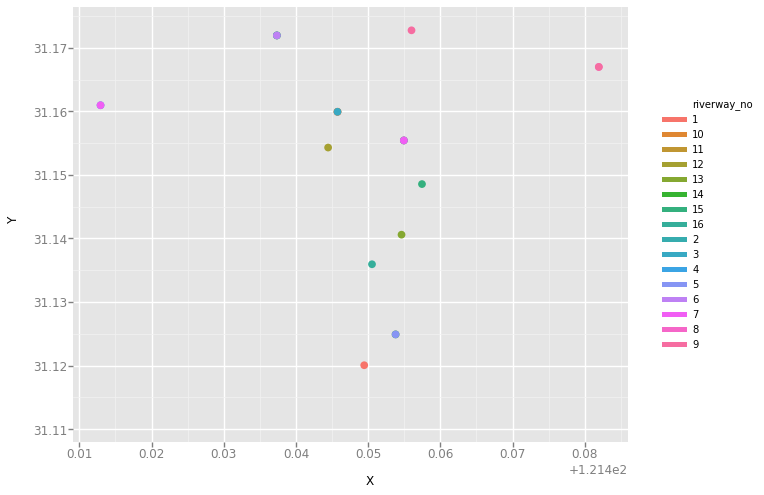

<ggplot: (-9223363261369600049)>


In [6]:
#site_map.plot(kind='scatter',x='X',y='Y',color='riverway_no')
p=gp.ggplot(gp.aes(x='X',y='Y',color='riverway_no'),data=site_map)+gp.geom_point(size=60)
print(p)

## 水质检测指标初步分析



### 水质全数据pH值分布

对水质ph值的总体绘图

In [ ]:
water_data = water_data[water_data.testtime>min(water_data.testtime) + datetime.timedelta(days=30)]
water_data = water_data[water_data.pH > 3]
water_data = water_data[water_data.pH < 12]
water_data.site_no = water_data.site_no.astype(np.str)
water_data.testtime = water_data.testtime.apply(parse)

In [ ]:
p=gp.ggplot(gp.aes(x='testtime',y='pH',color = 'site_no'),data=water_data)+gp.geom_point()
print(p)

### 水质全数据ORP值分布

对水质ORP值的总体绘图

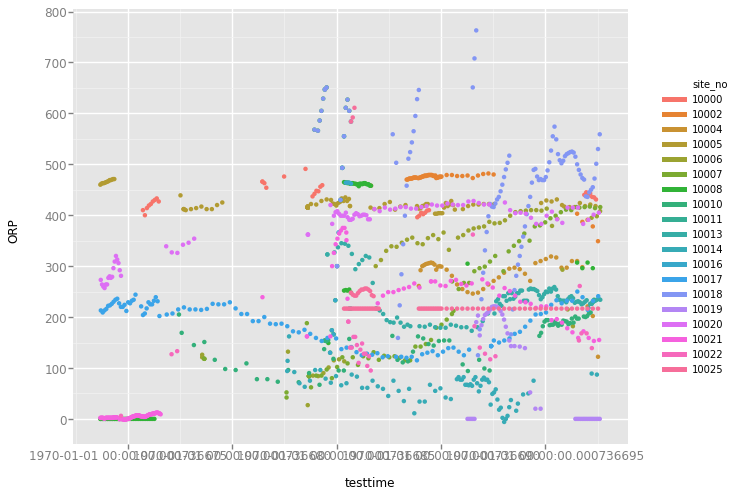

<ggplot: (8756557025926)>


In [82]:

p=gp.ggplot(gp.aes(x='testtime',y='ORP',color = 'site_no'),data=water_data)+gp.geom_point()+gp.scale_x_date(date_minor_breaks = "1 day")

print(p)

### 水质全数据P值分布

对水质P值的总体绘图

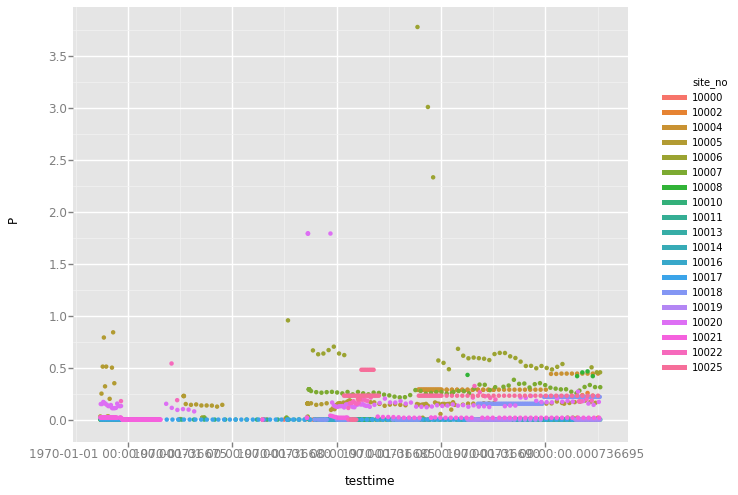

<ggplot: (8756557355184)>


In [83]:
water_data = water_data[water_data.P < 6]
p=gp.ggplot(gp.aes(x='testtime',y='P',color = 'site_no'),data=water_data)+gp.geom_point()
print(p)

In [9]:
# A list of water data, ID = Site_no
#首先，对数据进行归类和清洗，将每个站点的数据归纳到一个字典下，并且筛选掉有问题的数据
water_list = []
for i in range(10000,10029):
    water_temp = water_data[water_data.site_no==i]
    water_temp = water_temp[water_temp.pH>=3]
    water_temp.testtime = water_temp.testtime.apply(parse)
    if len(water_temp) > 0:
        water_list.append(water_temp)

water_list[9].testtime.describe()

count                     848
unique                    848
top       2017-11-26 16:02:31
freq                        1
first     2017-11-26 11:52:30
last      2018-01-03 08:01:02
Name: testtime, dtype: object

In [84]:
#纵向对一个站点的数据进行初步的绘图，观察有无相关联的可能性。

def plot_site_corelation(siteno):
    plt.subplot(1,1,1)  
    water_list[siteno].plot(x='testtime',y='pH',kind='line')
    water_list[siteno].plot(x='testtime',y='ORP',kind='line')
    water_list[siteno].plot(x='testtime',y='DO',kind='line')
    water_list[siteno].plot(x='testtime',y='turbidity',kind='line')
    water_list[siteno].plot(x='testtime',y='P',kind='line')


#plot_site_corelation(20)

### 各站点某参数横向比较

In [ ]:
# 横向比较各站点的变化


#def plot_site_corelation(siteno):
#for i in range(len(water_list)):
#    water_list[i].plot(x='testtime',y='pH',kind='line',title=i)


#plot_site_corelation(10021)
water_n.head()

In [ ]:
#归一化
water_n = water_data
water_n.pH = (water_n.pH - water_n.pH.min())/(water_n.pH.max()-water_n.pH.min())
water_n.EC = (water_n.EC - water_n.EC.min())/(water_n.EC.max()-water_n.EC.min())
water_n.ORP = (water_n.ORP - water_n.ORP.min())/(water_n.ORP.max()-water_n.ORP.min())
water_n.DO = (water_n.DO - water_n.DO.min())/(water_n.DO.max()-water_n.DO.min())
water_n.COD = (water_n.COD - water_n.COD.min())/(water_n.COD.max()-water_n.COD.min())
water_n.P = (water_n.P - water_n.P.min())/(water_n.P.max()-water_n.P.min())
water_n.NH3N = (water_n.NH3N - water_n.NH3N.min())/(water_n.NH3N.max()-water_n.NH3N.min())

#(df_test_1 - df_test_1.min()) / (df_test_1.max() - df_test_1.min())

In [ ]:
water_q = water_n[water_n.site_no=='10008']
water_q = water_n.loc[:,['testtime','pH','EC','ORP','DO','COD','P','NH3N']]
pd.melt(water_q,id_vars='testtime')
#water_melt.head()water_meltgplot(gp.aes(x='testtime',y='P',color = 'site_no'),data=water_data)+gp.geom_point()
#print(p)

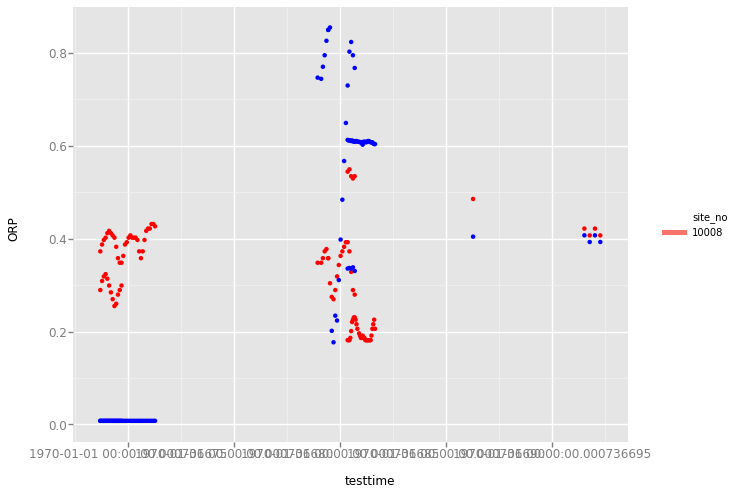

<ggplot: (8756558200054)>


In [117]:
p=gp.ggplot(gp.aes(x='testtime',color = 'site_no'),data=water_data[water_data.site_no=='10008'])+gp.geom_point(gp.aes(y='pH',color = 'red')) + gp.geom_point(gp.aes(y='ORP',color='blue'))     
print(p)